A notebook to inspect outputs of LSST Stack processing of DECam data on the NCSA developer account 

We used processing from https://github.com/lsst/obs_decam   . 

In [2]:
#Necessary imports 

import matplotlib.pyplot as plt
from astropy.table import Table
import os
import numpy as np
from astropy.io import fits
from astropy.stats import sigma_clipped_stats
from astropy.visualization import SqrtStretch
from astropy.visualization.mpl_normalize import ImageNormalize

In [3]:
outDir = '../data_products/LSST_Stack/DECam/'


## Photometry : Inspect the processed image 

/Users/chris/anaconda3/envs/py36/lib/python3.6/site-packages/astropy/visualization/stretch.py:115: RuntimeWarning: invalid value encountered in sqrt
  np.sqrt(values, out=values)
/Users/chris/anaconda3/envs/py36/lib/python3.6/site-packages/matplotlib/colors.py:494: RuntimeWarning: invalid value encountered in less
  cbook._putmask(xa, xa < 0.0, -1)


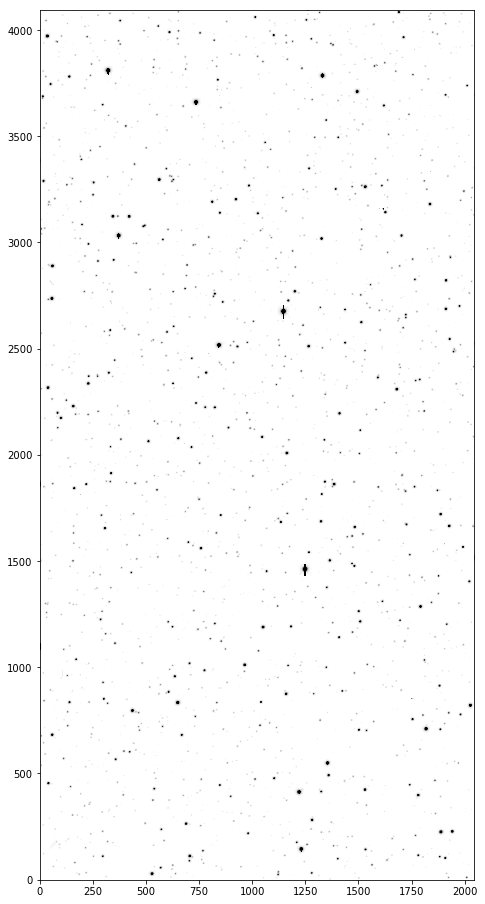

In [4]:
# g - band , 20 % , 96 sec exposure 
# ra 120.88400  dec -24.031667  , ccd 10  


%matplotlib inline

fname = 'calexp-0611980_10.fits'
hdu = fits.open(outDir + fname)
g_zeropoint = hdu[0].header['MAGZERO']

image_data = hdu[1].data
mean, median, std = sigma_clipped_stats(image_data, sigma=3.0, iters=5) 
threshold = 5 * std
norm = ImageNormalize(stretch=SqrtStretch())
fig,ax = plt.subplots(1,1,figsize = (8,16))
vmax=7000
f = 1
ax.imshow(image_data, cmap='Greys', origin='lower', norm=norm,
              vmax = vmax, 
              vmin = f*threshold)

Looks fine... 

## Photometry: Inspect the source catalog ... 

In [5]:
fname = 'src-0611980_10.fits'
hdu = fits.open(outDir + fname)
#http://www.astropy.org/astropy-tutorials/FITS-tables.html
hdu.info()
print(hdu[1].columns)

Filename: ../data_products/LSST_Stack/DECam/src-0611980_10.fits
No.    Name         Type      Cards   Dimensions   Format
  0  PRIMARY     PrimaryHDU       6   ()      
  1              BinTableHDU    611   4377R x 84C   [83X, 1K, 1D, 1D, 1K, 1J, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1E, 1E, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1E, 1E, 1E, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1E, 1E, 1E, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1J, 1J]   
  2              BinTableHDU     40   15399R x 7C   [1J, 1J, 1J, 1J, 1J, 64A, 64A]   
  3              BinTableHDU     17   4377R x 1C   [1J]   
  4              BinTableHDU     27   156936R x 3C   [1J, 1J, 1J]   
  5              BinTableHDU     42   5949R x 6C   [1K, 1E, 1E, 1J, 1J, 1E]   
  6              BinTableHDU     26   2268R x 3C   [1QE(10971), 1QJ(10971), 1QE(10971)]   
ColDefs(
    name = 'flags'; format = '83X'
    name =

Note : I don't see a table in magnitudes, only fluxes. Perhaps fluxes didn't get converted t magnitudes and I'd need to do it by hand ? But fluxes are in 'counts',  I would need zero point magnitude to convert that ...  ? 

In [177]:
hdu[1].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / 8-bit bytes                                    
NAXIS   =                    2 / 2-dimensional binary table                     
NAXIS1  =                  631 / width of table in bytes                        
NAXIS2  =                 6310 / number of rows in table                        
PCOUNT  =                    0 / size of special data area                      
GCOUNT  =                    1 / one data group (required keyword)              
TFIELDS =                   84 / number of fields in each row                   
TTYPE1  = 'flags   '           / bits for all Flag fields; see also TFLAGn      
TFORM1  = '83X     '           / format of field                                
FLAGCOL =                    1 / Column number for the bitflags.                
TTYPE2  = 'id      '           / unique ID                                      
TFORM2  = '1K      '        

In [14]:
g_data = Table(hdu[1].data)

mask_neg_fluxes = g_data['base_PsfFlux_flux'].data > 0
# just select rows that don't have negative fluxes...
g_data_good = g_data[mask_neg_fluxes]
g_data_good['mags_PsfFlux'] = -2.5 * np.log10(g_data_good['base_PsfFlux_flux'])   + g_zeropoint

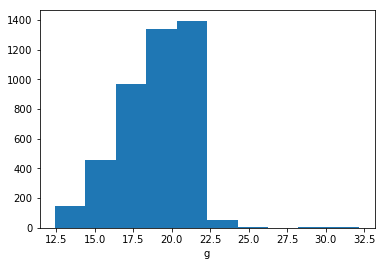

In [187]:
g = g_data_good['mags_PsfFlux']
plt.hist(g)
plt.xlabel('g')

/Users/chris/anaconda3/envs/py36/lib/python3.6/site-packages/astropy/visualization/stretch.py:115: RuntimeWarning: invalid value encountered in sqrt
  np.sqrt(values, out=values)
/Users/chris/anaconda3/envs/py36/lib/python3.6/site-packages/matplotlib/colors.py:494: RuntimeWarning: invalid value encountered in less
  cbook._putmask(xa, xa < 0.0, -1)


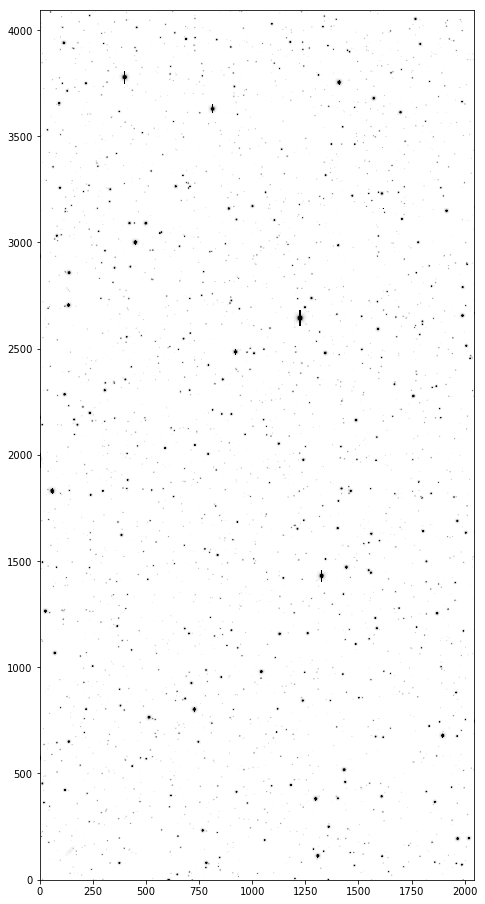

In [10]:
# Read in the r band ... 

# r - band , 20 % , 50 sec exposure 
# ra 120.886500  dec -24.025972   , ccd 10 

%matplotlib inline

fname = 'calexp-0611529_10.fits'
hdu = fits.open(outDir + fname)
r_zeropoint = hdu[0].header['MAGZERO']
image_data = hdu[1].data
mean, median, std = sigma_clipped_stats(image_data, sigma=3.0, iters=5) 
threshold = 5 * std
norm = ImageNormalize(stretch=SqrtStretch())
fig,ax = plt.subplots(1,1,figsize = (8,16))
vmax=7000
f = 1
ax.imshow(image_data, cmap='Greys', origin='lower', norm=norm,
              vmax = vmax, 
              vmin = f*threshold)

Looks same as g-band , which is good ! After all, it  should be approximately the same field (we chose ccd 10 ) , but in different band 

In [11]:
fname = 'src-0611529_10.fits'
hdu = fits.open(outDir + fname)
#print(hdu[1].columns)
r_data= Table(hdu[1].data)
mask_neg_fluxes = r_data['base_PsfFlux_flux'].data > 0
# just select rows that don't have negative fluxes...
r_data_good = r_data[mask_neg_fluxes]
r_data_good['mags_PsfFlux'] = -2.512 * np.log10(r_data_good['base_PsfFlux_flux'])   +r_zeropoint

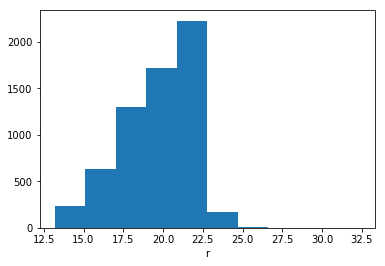

In [190]:
r = r_data_good['mags_PsfFlux']
plt.hist(r)
plt.xlabel('r')

Now, match by ra,dec   g_data_good and r_data_good tables : 
    
    

Note : the coordinates from the LSST Stack are in radians!!!! 

** degrees =  radians * (2 * np.pi )/ 360 **

## All in one step ( g,r photometry for 20% ccd10 ) 

In [28]:

    
# grab the zeropoints from image header
fname = 'calexp-0611980_10.fits'
hdu = fits.open(outDir + fname)
g_zeropoint = hdu[0].header['MAGZERO']

fname = 'calexp-0611529_10.fits'
hdu = fits.open(outDir + fname)
r_zeropoint = hdu[0].header['MAGZERO']

# read in source catalogs , select  good fluxes ... 
fname = 'src-0611980_10.fits'
hdu = fits.open(outDir + fname)
g_data = Table(hdu[1].data)
mask_neg_fluxes = g_data['base_PsfFlux_flux'].data > 0
g_data_good = g_data[mask_neg_fluxes]
g_data_good['mags_PsfFlux'] = -2.512 * np.log10(g_data_good['base_PsfFlux_flux'])   + g_zeropoint

fname = 'src-0611529_10.fits'
hdu = fits.open(outDir + fname)
r_data= Table(hdu[1].data)
mask_neg_fluxes = r_data['base_PsfFlux_flux'].data > 0
r_data_good = r_data[mask_neg_fluxes]
r_data_good['mags_PsfFlux'] = -2.512 * np.log10(r_data_good['base_PsfFlux_flux'])   +r_zeropoint


# match the catalogs by ra,dec (in radians...)
from astropy.coordinates import SkyCoord
from astropy import units as u

# r band coordinates
r_coord = SkyCoord(ra=r_data_good['coord_ra']*u.radian, 
                  dec=r_data_good['coord_dec']*u.radian)  
print(len(r_coord))

# g band coordinates 
g_coord = SkyCoord(ra=g_data_good['coord_ra']*u.radian, 
                   dec=g_data_good['coord_dec']*u.radian)  
print(len(g_coord))

# indices are into r_coord catalog 
idx, d2d, d3d = g_coord.match_to_catalog_sky(r_coord)  

# select only DECam fields that are matched to MAF 
matches = r_coord[idx]

6304
4370


In [29]:
r_data_matched_to_g  = r_data_good[idx]
from astropy.table import hstack
rg_matched = hstack([g_data_good, r_data_matched_to_g],table_names=['g','r']  )

In [31]:
rg_matched[['coord_ra_g', 'coord_ra_r']]

coord_ra_g,coord_ra_r
float64,float64
2.10699614277,2.10702545387
2.10698783662,2.10706370843
2.10700828363,2.10702632585
2.10698309379,2.1070650354
2.10698563455,2.10702440452
2.10698240827,2.10702401772
2.10698767651,2.10703354506
2.10698753249,2.10703354506
2.10699678317,2.10702537039


In [16]:
mask = d2d.arcsec < 2 # choose matches within 2 arcsec 

In [17]:
# How many of the 4370  g_coord have match within 2 arcsec to 
# one of 6370  r_coord ? 
print(np.sum(mask))

6304


In [18]:
# This means that all have very good matches. 

# Print the g-r vs r diagram for the matches  : 
r_data_matched_to_g  = r_data_good[idx]

In [19]:
from astropy.table import hstack

In [20]:
rg_matched = hstack([g_data_good, r_data_matched_to_g],table_names=['g','r']  )


In [21]:
rg_matched['mags_PsfFlux_g', 'mags_PsfFlux_r']

mags_PsfFlux_g,mags_PsfFlux_r
float64,float64
18.1683937156,18.4571764054
19.6520405282,19.9479447228
17.8509470626,18.1382060085
22.3749067383,22.6838806907
19.1658508476,19.4594213317
14.9618721357,15.235263522
19.6639086185,19.9598697799
15.7410432358,16.018174212
20.2284594734,20.5271304789


 "Conventionally, you take the bluer band minus the redder band, e.g., B-V, J-K. That way, larger numbers are always redder, and smaller numbers are always bluer. Depending on which bands you pick, exactly, it tells you different things. B-V, for example, can be mapped to temperature. K-[8] is a good way to look for IR excesses, e.g., disks." ( from http://coolwiki.ipac.caltech.edu/index.php/Color-Magnitude_and_Color-Color_plots ) 

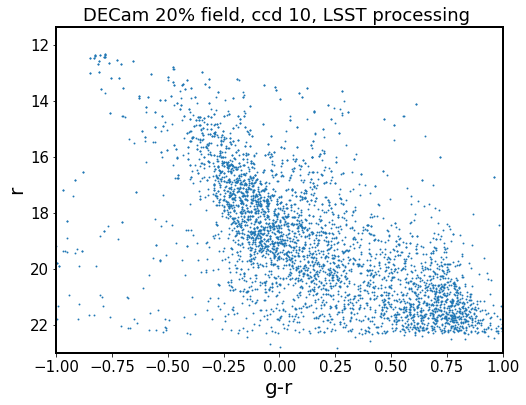

In [32]:
from matplotlib import rcParams      
rcParams['ytick.labelsize'] = 15
rcParams['xtick.labelsize'] = 15
rcParams['axes.labelsize'] = 20
rcParams['axes.linewidth'] = 2
rcParams['font.size'] = 15
rcParams['axes.titlesize'] = 18

g = rg_matched['mags_PsfFlux_g']
r = rg_matched['mags_PsfFlux_r']
fig,ax = plt.subplots(1,1,figsize=(8,6))
ax.scatter(g-r,g, s=0.8)
plt.gca().invert_yaxis()
ax.set_xlim(-1.0,1.0)
ax.set_ylim(23,)
ax.set_xlabel('g-r')
ax.set_ylabel('r')
ax.set_title('DECam 20% field, ccd 10, LSST processing ')

## Astrometry : Compare the results of 20% field in r :  CCD 10 vs CCD 11 


/Users/chris/anaconda3/envs/py36/lib/python3.6/site-packages/astropy/visualization/stretch.py:115: RuntimeWarning: invalid value encountered in sqrt
  np.sqrt(values, out=values)
/Users/chris/anaconda3/envs/py36/lib/python3.6/site-packages/matplotlib/colors.py:494: RuntimeWarning: invalid value encountered in less
  cbook._putmask(xa, xa < 0.0, -1)


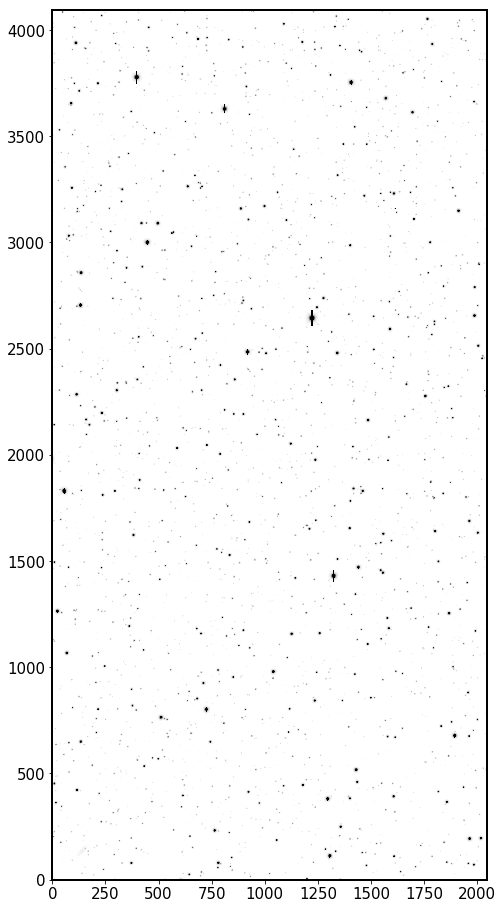

In [225]:
# CCD 10  : 
fname = 'calexp-0611529_10.fits'
hdu = fits.open(outDir + fname)
r_zeropoint = hdu[0].header['MAGZERO']
image_data = hdu[1].data
mean, median, std = sigma_clipped_stats(image_data, sigma=3.0, iters=5) 
threshold = 5 * std
norm = ImageNormalize(stretch=SqrtStretch())
fig,ax = plt.subplots(1,1,figsize = (8,16))
vmax=7000
f = 1
ax.imshow(image_data, cmap='Greys', origin='lower', norm=norm,
              vmax = vmax, 
              vmin = f*threshold)


/Users/chris/anaconda3/envs/py36/lib/python3.6/site-packages/astropy/visualization/stretch.py:115: RuntimeWarning: invalid value encountered in sqrt
  np.sqrt(values, out=values)
/Users/chris/anaconda3/envs/py36/lib/python3.6/site-packages/matplotlib/colors.py:494: RuntimeWarning: invalid value encountered in less
  cbook._putmask(xa, xa < 0.0, -1)


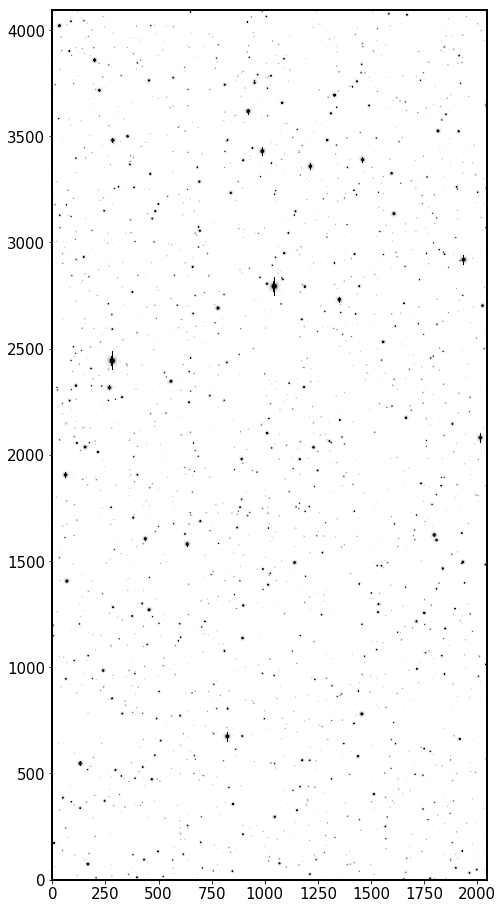

In [224]:
# CCD 11 : 

fname = 'calexp-0611529_11.fits'
hdu = fits.open(outDir + fname)
r_zeropoint = hdu[0].header['MAGZERO']
image_data = hdu[1].data
mean, median, std = sigma_clipped_stats(image_data, sigma=3.0, iters=5) 
threshold = 5 * std
norm = ImageNormalize(stretch=SqrtStretch())
fig,ax = plt.subplots(1,1,figsize = (8,16))
vmax=7000
f = 1
ax.imshow(image_data, cmap='Greys', origin='lower', norm=norm,
              vmax = vmax, 
              vmin = f*threshold)



In [226]:
# CCD 10 and  CCD 11 : sources ra, dec  :

fname = 'src-0611529_10.fits'
hdu = fits.open(outDir + fname)
data10= Table(hdu[1].data)

fname = 'src-0611529_11.fits'
hdu = fits.open(outDir + fname)
data11= Table(hdu[1].data)


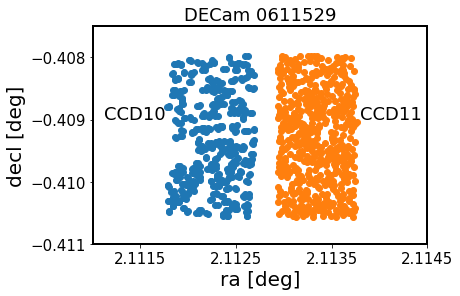

In [277]:
fig,ax = plt.subplots(1,1)
ax.scatter(data10['coord_ra'][-500:],data10['coord_dec'][-500:])
ax.scatter(data11['coord_ra'][:500],data11['coord_dec'][:500])
ax.set_xlim(2.111,2.1145)
ax.set_ylim(-.411, -.4075)
xticks = ax.get_xticks()
ax.set_xticks(xticks[1::2])
ax.set_xlabel('ra [deg]')
ax.set_ylabel('decl [deg]')
ax.set_title('DECam 0611529')
ax.text(2.11112,-0.409,'CCD10', fontsize=18, color='black')
ax.text(2.1138,-0.409,'CCD11', fontsize=18, color='black')

In [237]:
data10['coord_ra'][:10]

2.10702512113
2.10702537483
2.10702540318
2.10702545387
2.10702545809
2.10705328715
2.10702537039
2.10702632585
2.10703045016
2.10702471186
